In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt



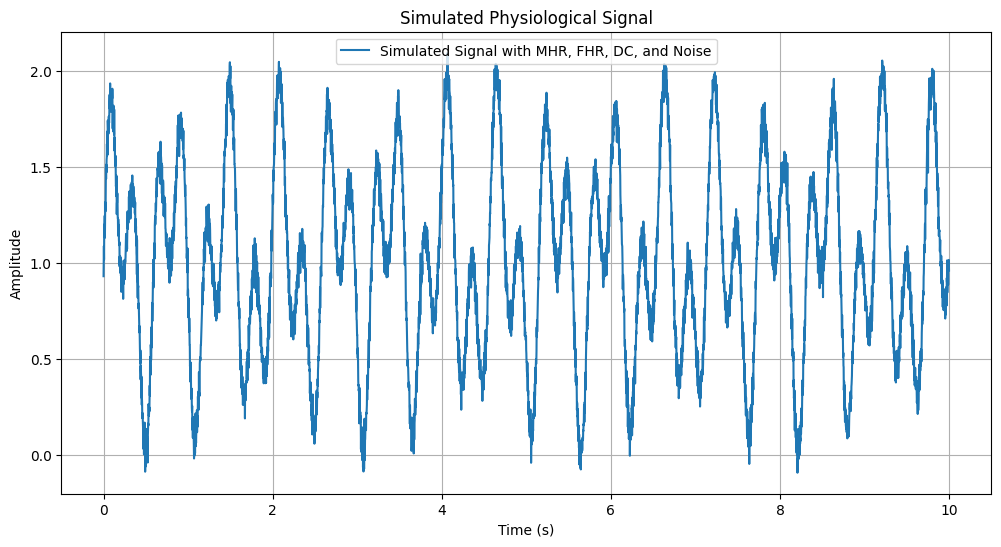

In [2]:
# Signal parameters
fs = 500  # Sampling frequency in Hz
T = 10    # Signal duration in seconds
t = np.linspace(0, T, int(T*fs), endpoint=False)  # Time vector

# Components parameters
DC_component = 1  # DC level
MHR_frequency = 1.55  # Maternal heart rate in Hz
FHR_frequency = 3.5   # Fetal heart rate in Hz
AC_amplitude = 0.5    # Amplitude of AC components
noise_level = 0.05    # Noise level

# Generating the signal
signal = DC_component + \
         AC_amplitude * np.sin(2 * np.pi * MHR_frequency * t) + \
         AC_amplitude * np.sin(2 * np.pi * FHR_frequency * t) + \
         np.random.normal(0, noise_level, len(t))  # Adding Gaussian noise

# Plotting the simulated signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Simulated Signal with MHR, FHR, DC, and Noise')
plt.title('Simulated Physiological Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


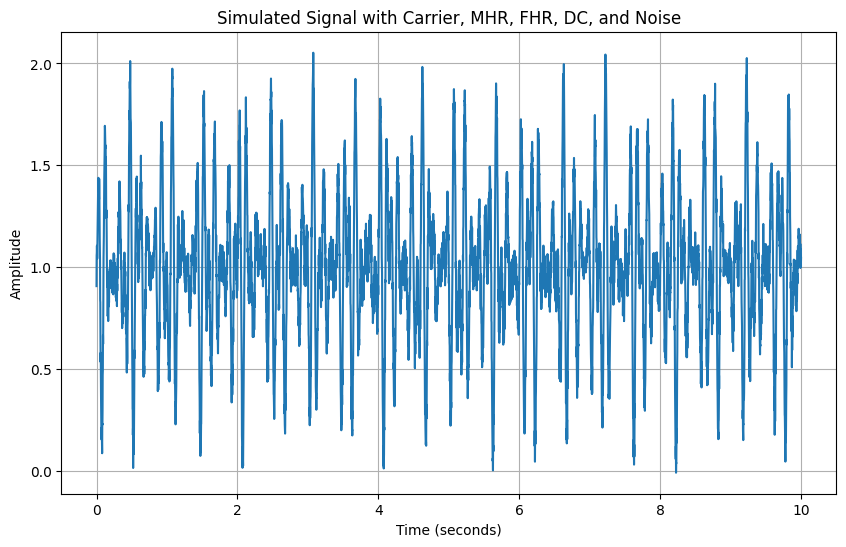

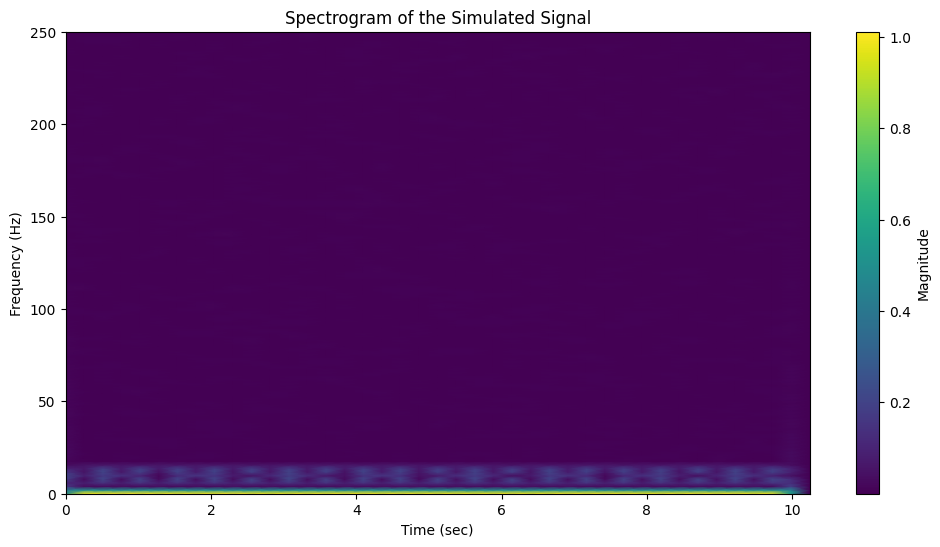

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Signal parameters
fs = 500  # Sampling frequency in Hz
T = 10    # Duration of the signal in seconds
t = np.linspace(0, T, int(T*fs), endpoint=False)  # Time vector

# Components parameters
DC_component = 1  # DC level
MHR_frequency = 1.55  # Maternal heart rate in Hz
FHR_frequency = 3.5   # Fetal heart rate in Hz
carrier_frequency = 10  # Carrier frequency for modulation
AC_amplitude = 0.5    # Amplitude of AC components
noise_level = 0.05    # Noise level

# Generating the signal with carrier modulation
carrier_signal = np.sin(2 * np.pi * carrier_frequency * t)  # Carrier signal
MHR_signal = AC_amplitude * np.sin(2 * np.pi * MHR_frequency * t)  # MHR component
FHR_signal = AC_amplitude * np.sin(2 * np.pi * FHR_frequency * t)  # FHR component
modulated_signal = carrier_signal * (MHR_signal + FHR_signal)  # Modulation
signal = DC_component + modulated_signal + np.random.normal(0, noise_level, len(t))  # Complete signal

# Time-domain plot
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('Simulated Signal with Carrier, MHR, FHR, DC, and Noise')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# STFT Analysis
frequencies, times, Zxx = stft(signal, fs, nperseg=256, noverlap=128, nfft=256)

# STFT / Spectrogram Visualization
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram of the Simulated Signal')
plt.ylim(0, fs/2)  # Limit frequency range to positive frequencies
plt.show()


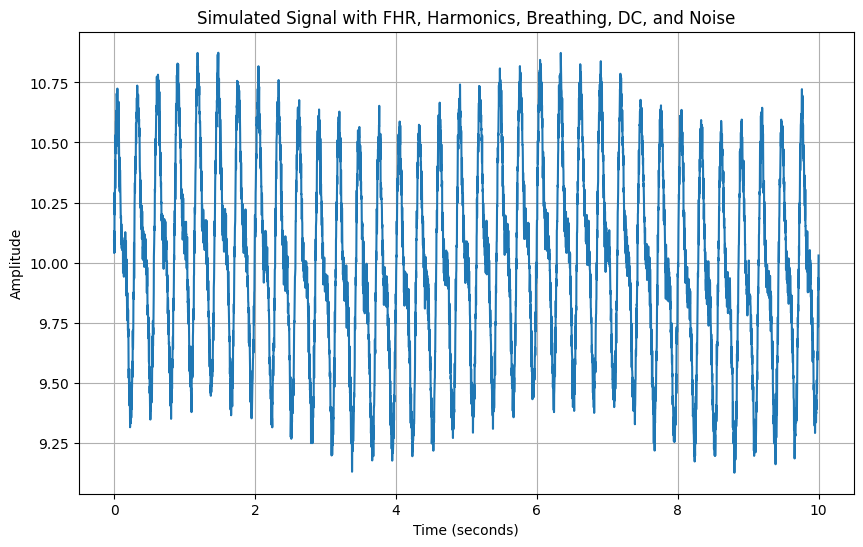

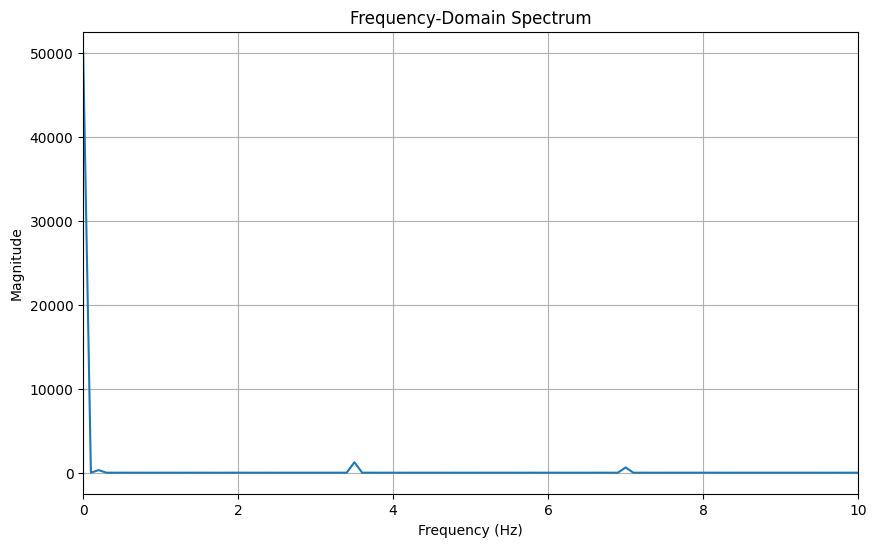

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Signal parameters
fs = 500  # Sampling frequency in Hz
T = 10    # Duration of the signal in seconds
t = np.linspace(0, T, int(T*fs), endpoint=False)  # Time vector

# Components parameters
DC_component = 10  # DC level
FHR_frequency = 3.5   # Fetal heart rate in Hz
FHR_harmonic_frequency = 2 * FHR_frequency  # Second harmonic of FHR
breathing_frequency = 0.2  # Breathing rate in Hz
AC_amplitude = 0.5    # Amplitude of AC components
noise_level = 0.05    # Noise level

# Generating the components of the signal
FHR_signal = AC_amplitude * np.sin(2 * np.pi * FHR_frequency * t)  # FHR component
FHR_harmonic_signal = AC_amplitude * 0.5 * np.sin(2 * np.pi * FHR_harmonic_frequency * t)  # FHR harmonic
breathing_signal = AC_amplitude * 0.25 * np.sin(2 * np.pi * breathing_frequency * t)  # Breathing component

# Complete signal
signal = DC_component + FHR_signal + FHR_harmonic_signal + breathing_signal + np.random.normal(0, noise_level, len(t))

# Perform FFT
fft_result = fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Visualizing the signal (time-domain)
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('Simulated Signal with FHR, Harmonics, Breathing, DC, and Noise')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Visualizing the frequency spectrum
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_magnitude = np.abs(fft_result)[:len(frequencies) // 2]


plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_magnitude)
plt.title('Frequency-Domain Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 10)  # Adjust the x-axis limit to 10 Hz to focus on the lower frequencies
plt.show()



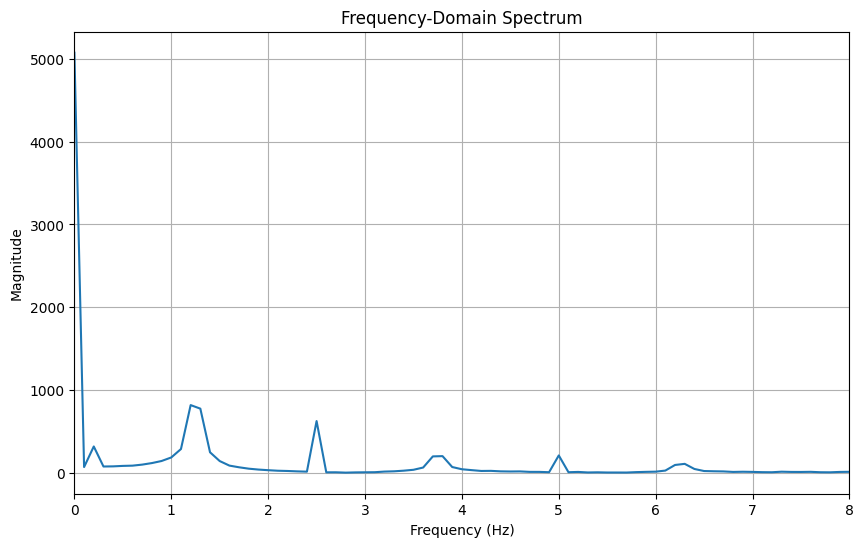

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Signal parameters
fs = 500  # Sampling frequency in Hz
T = 10    # Duration of the signal in seconds
t = np.linspace(0, T, int(T*fs), endpoint=False)  # Time vector

# Components parameters
DC_component = 1  # DC level
FHR_frequency = 1.25   # Fetal heart rate in Hz
FHR_harmonic_frequencies = [FHR_frequency * n for n in range(2, 6)]  # Harmonics of FHR
breathing_frequency = 0.2  # Breathing rate in Hz
AC_amplitude = 0.5    # Amplitude of AC components
noise_level = 0.05    # Noise level

# Generating the components of the signal
FHR_signal = AC_amplitude * np.sin(2 * np.pi * FHR_frequency * t)  # FHR component
FHR_harmonic_signals = [AC_amplitude * (0.5/n) * np.sin(2 * np.pi * f * t) for n, f in enumerate(FHR_harmonic_frequencies, start=1)]  # FHR harmonics
breathing_signal = AC_amplitude * 0.25 * np.sin(2 * np.pi * breathing_frequency * t)  # Breathing component

# Complete signal including harmonics
signal = DC_component + FHR_signal + sum(FHR_harmonic_signals) + breathing_signal + np.random.normal(0, noise_level, len(t))

# Perform FFT
fft_result = fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Visualizing the frequency spectrum
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_magnitude = np.abs(fft_result)[:len(frequencies) // 2]

plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_magnitude)
plt.title('Frequency-Domain Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 8)  # Adjusted to focus on the range with the fundamental and harmonics
plt.show()


In [9]:
# Identify the indices for MHR and its harmonics in the frequency bins
mhr_index = np.argmin(np.abs(frequencies - MHR_frequency))
harmonic_indices = [np.argmin(np.abs(frequencies - MHR_frequency * n)) for n in range(2, 3)]  # Considering up to the 2nd harmonic

# Calculate energy at MHR and its harmonics
energy_mhr = np.abs(fft_result[mhr_index])**2
energy_harmonics = sum(np.abs(fft_result[idx])**2 for idx in harmonic_indices)

# Calculate total signal energy, excluding the DC component
total_energy = np.sum(np.abs(fft_result[1:])**2)  # Exclude index 0 (DC component)

# Compute the energy ratio
energy_ratio_mhr = (energy_mhr + energy_harmonics) / total_energy

print(f"Energy ratio of MHR (including harmonics) to total signal energy: {energy_ratio_mhr}")


Energy ratio of MHR (including harmonics) to total signal energy: 8.658948845320949e-06


In [10]:
# Assuming MHR_frequency is defined
T_MHR = 1 / MHR_frequency  # Period of one heartbeat cycle in seconds

# Assuming a starting point is identified, let's use the start of the signal for simplicity
start_index = 0
end_index = int(T_MHR * fs)  # Index for the end of one cycle

# Extract the signal for one MHR cycle
signal_cycle = signal[start_index:end_index]

# Calculate Imax and Imin for the cycle
Imax = np.max(signal_cycle)
Imin = np.min(signal_cycle)

# Calculate the relative change in light intensity
relative_intensity_change = (Imax - Imin) / Imin

print("Relative change in light intensity over one heartbeat cycle:", relative_intensity_change)


Relative change in light intensity over one heartbeat cycle: 20.740109122880018
